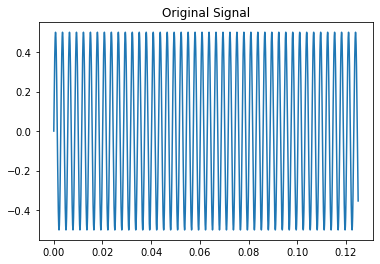

In [3]:
from sklearn import linear_model
from scipy.fftpack import dct, idct
from scipy.sparse import coo_matrix
from matplotlib.pyplot import plot, show, figure, title
import numpy as np
np.set_printoptions(threshold=np.inf)

# Initializing constants and signals
# Sine is A is y(t) = amplitude * sin(2 * pi * frequency * time) - time/sampling rate
N = 5500 # Number of time stamps
FS = 44000 # Sampling rate
M = 275 #Sampling number
f1 = 349 # Frequency of an F4 note on a piano
duration = 1./8
t = np.linspace(0, duration, int(duration * FS))
f = 0.5 * np.sin(2 * np.pi * f1 * t) 

plot(t, f)
title('Original Signal')
show()

In [25]:
from scipy.io import wavfile
wavfile.write('CSA1.wav', FS, f)

#Audio(f, rate=FS)

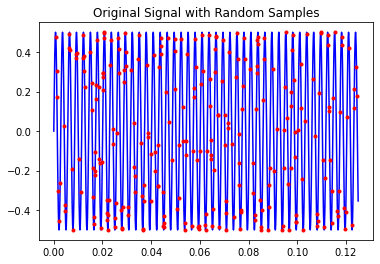

In [26]:
f = np.reshape(f, (len(f), 1))
# Randomly sampling the test signal
k = np.random.randint(0, N, (M,)) # get random indices
k = np.sort(k)  # making sure the random samples are monotonic
b = f[k]
plot(t, f, 'b', t[k], b, 'r.')
title('Original Signal with Random Samples')
show()

In [27]:
D = dct(np.eye(N)) # Here, we model using the DCT
A = D[k, :]

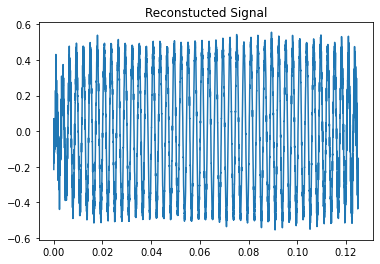

In [28]:
lasso = linear_model.Lasso(alpha=0.001)# here, we use lasso to minimize the L1 norm
lasso.fit(A, b.reshape((M,)))
# Plotting the reconstructed coefficients and the signal
# Creates the fourier transform that will most minimize l1 norm 
recons = idct(lasso.coef_.reshape((N, 1)), axis=0) # inverse fourier transform
recons = recons.reshape(5500,)
figure()
plot(t,recons)
title('Reconstucted Signal')
show()

In [29]:
wavfile.write('CSA2.wav', FS, recons)

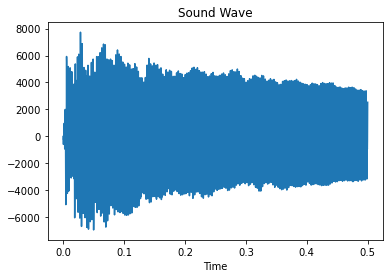

In [4]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import wave, sys
N = 24000 # Number of time stamps

M = 18000 #Sampling number
# shows the sound waves
 # reading the audio file
raw = wave.open('F41sec.wav')
# reads all the frames
# -1 indicates all or max frames
signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype ="int16")
# gets the frame rate
f_rate = raw.getframerate()
duration = 1./2
time = np.linspace(0, duration, int(duration * f_rate))

plt.figure(1)
plt.title("Sound Wave")
# label of x-axis
plt.xlabel("Time")
plt.plot(time, signal[:24000])
plt.show()



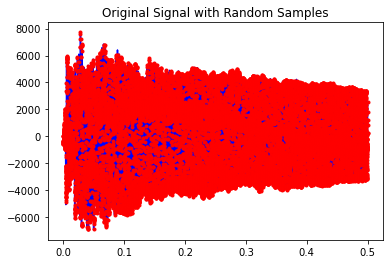

In [5]:
signal = np.reshape(signal, (len(signal), 1))
# Randomly sampling the test signal
k = np.random.randint(0, N, (M,)) # get random indices
k = np.sort(k)  # making sure the random samples are monotonic
b = signal[k]
plot(time, signal[:24000], 'b', time[k], b, 'r.')
title('Original Signal with Random Samples')
show()

In [6]:
D = dct(np.eye(N)) # Here, we model using the DCT
A = D[k, :]


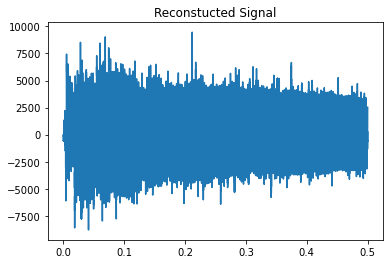

In [7]:
lasso = linear_model.Lasso(alpha=0.001)# here, we use lasso to minimize the L1 norm
lasso.fit(A, b.reshape((M,)))
# Plotting the reconstructed coefficients and the signal
# Creates the fourier transform that will most minimize l1 norm 
recons = idct(lasso.coef_.reshape((N, 1)), axis=0) # inverse fourier transform
recons = recons.reshape(N,)
figure()
plot(time[:24000],recons)
title('Reconstucted Signal')
show()

In [9]:
from scipy.io import wavfile
wavfile.write('F4recon75.wav', f_rate, recons)

In [122]:
wavfile.write('F4orig.wav', f_rate, signal)